# Advanced Visualization

## Exploring Datasets with pandas and Matplotlib

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
! conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [3]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                                                                                              sheet_name='Canada by Citizenship',
                                                                                              skiprows=range(20),
                                                                                              skipfooter=2)
                      
print ('Data donloaded and read into a dataframe!')

Data donloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName': 'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] = df_can.sum (axis = 1)

years = list(map(str, range(1980,2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Acer\AppData\Local\Temp\ipykernel_9736\96607708.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


# Visualizing Data using Matplotlib

In [7]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print ('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.5.1


# Waffle Charts(Optional)

In [8]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [9]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [10]:
width = 40 
height = 10

total_num_tiles = width * height

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [11]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


In [12]:
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
    if tile_index > sum(tiles_per_category[0:category_index]):
        category_index += 1
        
    waffle_chart[row, col] = category_index
print ('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

C:\Users\Acer\AppData\Local\Temp\ipykernel_9736\2255068170.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

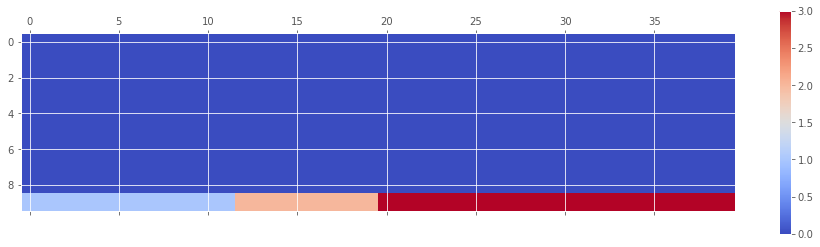

In [14]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9736\3907576168.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


([], [])

<Figure size 432x288 with 0 Axes>

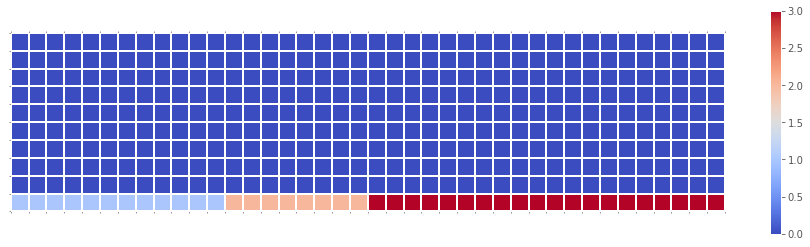

In [15]:
fig = plt.figure()

colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

C:\Users\Acer\AppData\Local\Temp\ipykernel_9736\3647256119.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

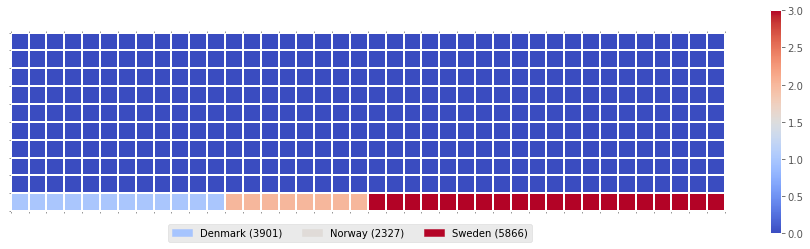

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
    plt.legend(handles=legend_handles,
              loc='lower center',
              ncol=len(df_dsn.index.values),
              bbox_to_anchor=(0., -0.2, 0.95, .1)
              )

In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    total_num_tiles = width * height
    print ('Total number of tiles is', total_num_tiles)
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ':' +str(tiles))
        
        waffle_chart = np.zeros((height, width))
        
        category_index = 0
        tile_index = 0
        
        for col in range(width):
            for row in range(height):
                tile_index += 1
                
                if tile_index > sum(tiles_per_category[0:category_index]):
                    category_index += 1
                    
                    waffle_chart[row, col] =category_index
                    
                fig = plt.figure()

                colormap = plt.cm.coolwarm 
                plt.matshow(waffle_chart, cmap=colormap)
                plt.colorbar()

                ax = plt.gca()
                ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
                ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
                ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

                plt.xticks([])
                plt.yticks([])

                values_cumsum = np.cumsum(values)
                total_values = values_cumsum[len(values_cumsum) - 1]

                legend_handles = []
                for i, category in enimerate(categories):
                    if value_sign == '%': label_str = category + '(' + str(values[i]) + value_sign + ')'
                    else:
                        label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
                        color_val = colormap(float(values_cumsum[i])/total_values)
                        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
             
                        plt.legend(handles=legend_handles,
                                   loc='lower center',
                                   ncol=len(df_dsn.index.values),
                                   bbox_to_anchor=(0., -0.2, 0.95, .1)
                                   )

In [18]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark:129


C:\Users\Acer\AppData\Local\Temp\ipykernel_9736\1595325496.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


NameError: name 'enimerate' is not defined

<Figure size 432x288 with 0 Axes>

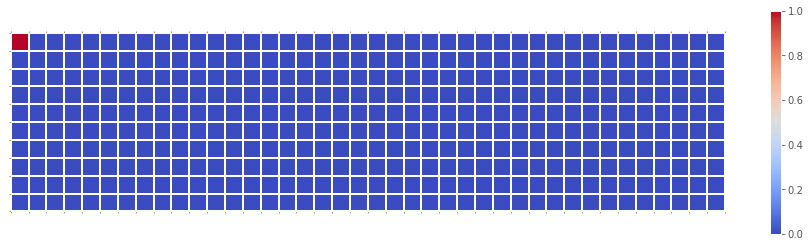

In [19]:
create_waffle_chart(categories, values, height,width, colormap)

# Word Clouds

In [ ]:
! pip install wordcloud 

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

In [ ]:
! wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -o alice_novel.txt
    
alice_novel = open('alice_novel.txt', 'r').read()

print ('File donwloaded and saved')